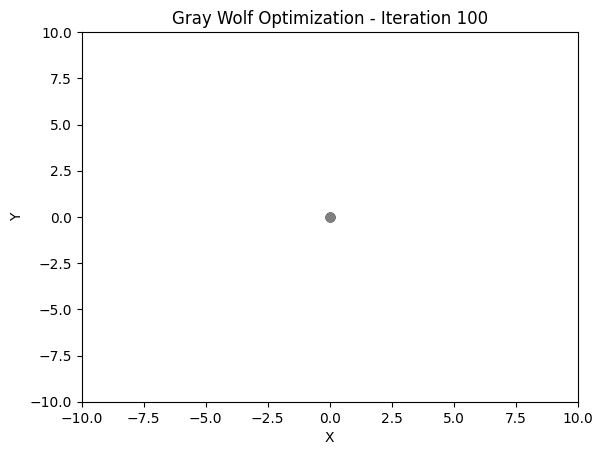

Best position: [2.78445643e-64 3.18400171e-64]
Best fitness: 1.7891064478379187e-127


<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gray_wolf_optimization(obj_func, lb, ub, dim, population_size, max_iterations, visualize_interval):
    alpha_pos = np.zeros(dim)
    alpha_score = float('inf')
    beta_pos = np.zeros(dim)
    beta_score = float('inf')
    delta_pos = np.zeros(dim)
    delta_score = float('inf')
    positions = np.zeros((population_size, dim))
    fitness = np.zeros(population_size)

    # Initialize the positions
    for i in range(population_size):
        positions[i] = np.random.uniform(lb, ub, dim)
        fitness[i] = obj_func(positions[i])

        if fitness[i] < alpha_score:
            alpha_score = fitness[i]
            alpha_pos = positions[i]
        if fitness[i] > alpha_score and fitness[i] < beta_score:
            beta_score = fitness[i]
            beta_pos = positions[i]
        if fitness[i] > alpha_score and fitness[i] > beta_score and fitness[i] < delta_score:
            delta_score = fitness[i]
            delta_pos = positions[i]

    # Main optimization loop
    for iteration in range(max_iterations):
        a = 2 - (iteration * (2 / max_iterations))

        for i in range(population_size):
            r1 = np.random.random(dim)
            r2 = np.random.random(dim)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2

            D_alpha = np.abs(C1 * alpha_pos - positions[i])
            X1 = alpha_pos - A1 * D_alpha

            r1 = np.random.random(dim)
            r2 = np.random.random(dim)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2

            D_beta = np.abs(C2 * beta_pos - positions[i])
            X2 = beta_pos - A2 * D_beta

            r1 = np.random.random(dim)
            r2 = np.random.random(dim)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2

            D_delta = np.abs(C3 * delta_pos - positions[i])
            X3 = delta_pos - A3 * D_delta

            new_position = (X1 + X2 + X3) / 3
            new_position = np.clip(new_position, lb, ub)
            new_fitness = obj_func(new_position)

            if new_fitness < fitness[i]:
                fitness[i] = new_fitness
                positions[i] = new_position

                if new_fitness < alpha_score:
                    alpha_score = new_fitness
                    alpha_pos = new_position
                if new_fitness > alpha_score and new_fitness < beta_score:
                    beta_score = new_fitness
                    beta_pos = new_position
                if new_fitness > alpha_score and new_fitness > beta_score and new_fitness < delta_score:
                    delta_score = new_fitness
                    delta_pos = new_position

        # Visualization of the search space
        if (iteration + 1) % visualize_interval == 0:
            if dim == 2:
                plt.scatter(alpha_pos[0], alpha_pos[1], color='red')
                plt.scatter(beta_pos[0], beta_pos[1], color='blue')
                plt.scatter(delta_pos[0], delta_pos[1], color='green')
                plt.scatter(positions[:, 0], positions[:, 1], color='gray', alpha=0.5)
                plt.xlim(lb, ub)
                plt.ylim(lb, ub)
                plt.xlabel('X')
                plt.ylabel('Y')
                plt.title('Gray Wolf Optimization - Iteration {}'.format(iteration + 1))
                plt.pause(0.01)
                plt.clf()

    return alpha_pos, alpha_score

# Define the objective function
def sphere(x):
    return np.sum(x**2)

# Set the bounds and other parameters
lower_bound = -10
upper_bound = 10
dimensions = 2
pop_size = 50
iterations = 100
visualize_interval = 100

# Run the optimization
best_position, best_fitness = gray_wolf_optimization(sphere, lower_bound, upper_bound, dimensions, pop_size, iterations, visualize_interval)

print('Best position:', best_position)
print('Best fitness:', best_fitness)
